In [1]:
import io
import requests
import numerapi

In [2]:
napi = numerapi.NumerAPI(verbosity='info')

---
### 投資可能ユニバース

https://numerai-quant-public-data.s3-us-west-2.amazonaws.com/example_predictions/latest.csv

In [35]:
res = requests.get("https://numerai-quant-public-data.s3-us-west-2.amazonaws.com/example_predictions/latest.csv")

In [36]:
df = pd.read_csv(io.StringIO(res.content.decode('utf-8')), header=0, index_col=0)

In [37]:
df.head(3)

,prediction
ticker,
1999 HK,0.548814
1972 HK,0.715189
1299 HK,0.602763


In [38]:
# stock_idとregionのdataframe
universe = pd.DataFrame([val.split(" ") for val in df.index.values], columns=["stock_id", "region"])
universe.fillna("blank", inplace=True)
universe.head(3)

,stock_id,region
0,1999,HK
1,1972,HK
2,1299,HK


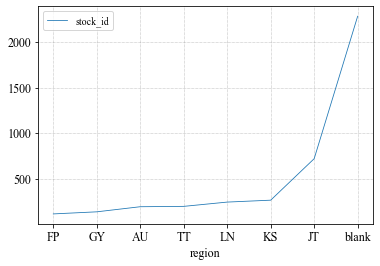

In [39]:
# 上位region
universe.groupby("region").count().sort_values(by="stock_id").tail(8).plot()

blank: US->blank  
JT: JP-> .T  
KS: KR-> .KS  
LN: UK-> .L  
TT: ??  
AU: AUD-> .AX  
GY: Deutche-> .DE  
FP: France-> .PA

MM: Mexico  
BS: Brasil-> .SA   
.: Toronto-> .TO  
TI: Istanbur-> .IS  
SW: Swiss-> .SW

---

### LeaderBoard

In [16]:
lb = pd.DataFrame(napi.get_leaderboard(limit=500))

In [17]:
lb.head()

,averageCorrelationPayout,badges,bonusPerc,leaderboardBonus,nmrStaked,oldStakeValue,payoutPending,payoutSettled,prevRank,prevStakedRank,rank,reputation,rolling_score_rep,stakedRank,tier,username
0,0.000000000000000000,[burned_2],0.0,0.000000000000000000,0E-18,None,0.000000000000000000,0.000000000000000000,1,NaN,1,0.294052,0.067754,NaN,?,oblique
1,0.000000000000000000,"[submission-streak_1, burned_2, compute_0]",5.0,0.000000000000000000,4.788297108047401000,None,-0.206154572835379660,-0.206154572835379660,2,1.0,2,0.268462,0.062918,1.0,S+,hb
2,0.000000000000000000,[burned_2],0.0,0.000000000000000000,0E-18,None,0.000000000000000000,0.000000000000000000,7,NaN,3,0.245121,0.056970,NaN,?,orthogonal
3,0.000000000000000000,"[submission-streak_1, burned_3]",4.0,0.157974415459681660,49.876409717263940000,None,-1.801953342801189100,-1.801953342801189100,3,2.0,4,0.254333,0.056850,2.0,S,yudanshaii
4,0.000000000000000000,"[submission-streak_1, burned_3]",4.0,0.059556840396499860,23.642447531512445000,None,-0.034963150556524250,-0.034963150556524250,5,4.0,5,0.282211,0.056566,3.0,S,akumei2


In [18]:
lb.shape

(500, 16)

---

### get_user_activities

In [52]:
username = lb.username.iloc[0]

In [41]:
user_log = pd.DataFrame(napi.get_user_activities(lb.username.iloc[15]))
user_sub = pd.DataFrame(user_log.submission.tolist())

In [63]:
user_sub.head(5)

,concordance,consistency,date,liveAuroc,liveCorrelation,liveLogloss,validationAuroc,validationCorrelation,validationLogloss
0,None,NaN,2020-07-19 05:37:40+00:00,None,None,None,None,0.024249,None
1,None,NaN,2020-07-11 19:31:13+00:00,None,None,None,None,0.024249,None
2,None,NaN,2020-07-04 19:29:35+00:00,None,None,None,None,0.024249,None
3,None,NaN,2020-06-27 19:35:12+00:00,None,None,None,None,0.024249,None
4,None,NaN,2020-06-20 19:35:25+00:00,None,None,None,None,0.024249,None


---

### daily_submissions_performances

In [60]:
df = pd.DataFrame(napi.daily_submissions_performances(username=username))

In [62]:
df.head()

,correlation,correlationWithMetamodel,date,mmc,roundNumber
0,-0.030603,-0.674683,2019-08-15 00:00:00+00:00,-0.009393,172
1,0.039165,-0.674683,2019-08-16 00:00:00+00:00,0.026826,172
2,0.051502,-0.674683,2019-08-17 00:00:00+00:00,0.041294,172
3,0.041285,-0.674683,2019-08-20 00:00:00+00:00,0.027829,172
4,0.036954,-0.674683,2019-08-21 00:00:00+00:00,0.025733,172


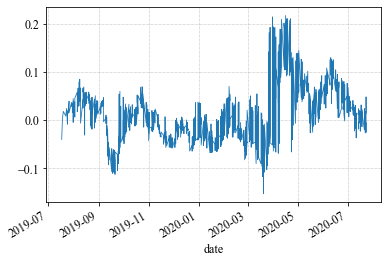

In [69]:
df.set_index("date").correlation.plot()

In [72]:
df = pd.DataFrame(napi.daily_submissions_performances(username="uki"))

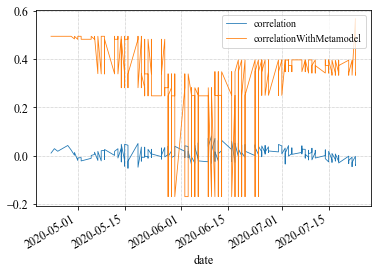

In [75]:
df.set_index("date")[["correlation", "correlationWithMetamodel"]].plot()